In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# LN3: 주택실거래가 데이터 분석(2)

- series: array 같이 한 칼럼만 있는 데이터 유형
- data frame: 여러 칼럼을 가짐

In [4]:
# Pandas에서 다루는 데이터 유형 중 Series 만들어 보자
s=pd.Series(np.random.randn(4),name='return') 
# 무작위 숫자 4개를 정규분포(randn,보통 -3에서 3까지의 값을 갖는다)에서 생성한다.
# return 이라는 이름으로 저장한다
s

0    0.321473
1    0.893609
2   -0.054099
3   -0.036812
Name: return, dtype: float64

In [5]:
type(s)

pandas.core.series.Series

In [8]:
# Panadas로 data frame 만들어보자

# 먼저 리스트를 생성한다
data=[[1,2,3],[4,5,6],[7,8,9]]

# pandas로 위의 리스트를 data frame으로 바꾸자
df2=pd.DataFrame(data)
df2

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [9]:
# 칼럼 이름 바꾸고 싶으면 ,columns= 하고 이름을 바꿔준다
df1=pd.DataFrame(data,columns=['a','b','c'])
df1

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [10]:
# 앞서 수집한 주택 실거래가 데이터를 pandas의 data frame으로 가져와보자
# house_price.csv 불러오자

df=pd.read_csv("c:/temp/house_price.csv")
df

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


In [11]:
# 거래된 수가 196건

In [12]:
df.columns # 칼럼의 이름이 나온다

Index(['Unnamed: 0', 'year', 'month', 'day', 'price', 'built_yr', 'dong_name',
       'apt_name', 'size', 'gu_code', 'size_pyung', 'price_pyung'],
      dtype='object')

In [18]:
# 칼럼 삭제하고 싶다
df2=df.drop('Unnamed: 0',axis=1)
df2
# df: unnamed 0 여전히 가지고 있음

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...
191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


#### 데이터프레임의 일부분 가져오기

- df2.iloc, df.loc: 의 함수를 이용해서 주어진 데이터의 일부분을 가져올 수 있다.
- .iloc[(row 번호), (column 번호)]: 번호로 가져오고, (,)이거 안에서 뒤에거 보다 하나 앞으로 가져옴  
- df2.iloc[2:4, 1:3]: row로는 2~3번, column은 1~2번 가져옴
- .loc: row와 column의 레이블을 이용해서 가져오는 방식 -> column의 이름을 사용!, row 가져올때는 .index[범위] ( index는 맨 앞에 찐한 숫자)

In [20]:
df2.iloc[2:4]

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994


In [21]:
df2.iloc[2:4,1:3]

,month,day
2,6,2
3,6,2


In [22]:
df2.loc[df2.index[2:5],['month','price']]

,month,price
2,6,290000
3,6,210000
4,6,175000


In [23]:
df2.info()
# 칼럼이 어떤 형식의 변수인지 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         196 non-null    int64  
 1   month        196 non-null    int64  
 2   day          196 non-null    int64  
 3   price        196 non-null    int64  
 4   built_yr     196 non-null    int64  
 5   dong_name    196 non-null    object 
 6   apt_name     196 non-null    object 
 7   size         196 non-null    float64
 8   gu_code      196 non-null    int64  
 9   size_pyung   196 non-null    float64
 10  price_pyung  196 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 17.0+ KB


In [24]:
# int: 숫자 중 정수, object: 문자, float: 소수점있는 경우

In [25]:
# 숫자의 천의자리마다 , 찍혀있으면 숫자가 아니라 파이썬에서 문자로 불러들이게 됨. 
# 그래서 숫자로 바꿔줘야 함
# 지금은 다 숫자이긴 함. 콤마 찍힌 거가 없음

In [26]:
# 아파트 면적을 평으로 계산한 것
df2['size_p']=df2['size']/3.3 
df2['price_p']=df2['price']/df2['size_p']
df2

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung,size_p,price_p
0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420,24.951515,6011.658975
1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465,45.148485,3433.116317
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734,56.200000,5160.142349
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994,51.236364,4098.651526
4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217,25.730303,6801.319044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168,18.087879,8126.989445
192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033,25.700000,6225.680934
193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572
194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572


In [27]:
# data frame 에서 기술통계량
# 문자말고 숫자 변수에 대해서만 나옴
df2.describe()

,year,month,day,price,built_yr,size,gu_code,size_pyung,price_pyung,size_p,price_p
count,196.0,196.0,196.000000,196.000000,196.000000,196.000000,196.0,196.000000,196.000000,196.000000,196.000000
mean,2021.0,6.0,15.301020,201090.770408,2000.775510,96.555573,11650.0,28.995668,7378.031921,29.259265,7311.563165
std,0.0,0.0,7.946371,95597.319324,12.309288,50.931205,0.0,15.294656,3221.817176,15.433699,3192.791796
min,2021.0,6.0,1.000000,19000.000000,1974.000000,18.530000,11650.0,5.564565,2688.707038,5.615152,2664.484452
25%,2021.0,6.0,10.750000,139000.000000,1992.750000,60.087500,11650.0,18.044294,4682.251207,18.208333,4640.068764
50%,2021.0,6.0,15.000000,206875.000000,2003.000000,84.910000,11650.0,25.498498,6889.850555,25.730303,6827.779829
75%,2021.0,6.0,21.000000,270000.000000,2011.000000,115.980000,11650.0,34.828829,9724.376968,35.145455,9636.769968
max,2021.0,6.0,30.000000,510000.000000,2020.000000,244.980000,11650.0,73.567568,15601.412596,74.236364,15460.859329


In [28]:
df2['price'].mean()

201090.77040816325

In [31]:
df2.mean() # 문자 변수가 있기 때문에 오류나는 것
# ??? 왜 오류가 안나지??

year             2021.000000
month               6.000000
day                15.301020
price          201090.770408
built_yr         2000.775510
size               96.555573
gu_code         11650.000000
size_pyung         28.995668
price_pyung      7378.031921
size_p             29.259265
price_p          7311.563165
dtype: float64

In [32]:
# csv 파일로 저장한다.
df2.to_csv('c:/temp/house_price101.csv')

In [34]:
# 한글이 깨진다면
df2.to_csv('c:/temp/house_price102.csv',encoding='utf-8-sig')

### 2 주택실거래가 히스토그램

matplotlib.pyplot, seaborn 패키지를 사용한다

In [35]:
# 서울시 서초구 2021년 6월에 거래된 아파트 매매 데이터를 불러와서 평당가격에 대한 히스토그램 작성하자

df4=pd.read_csv('c:/temp/house_price1.csv')
df4

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung,size_p,price_p
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420,24.951515,6011.658975
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465,45.148485,3433.116317
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734,56.200000,5160.142349
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994,51.236364,4098.651526
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217,25.730303,6801.319044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168,18.087879,8126.989445
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033,25.700000,6225.680934
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572


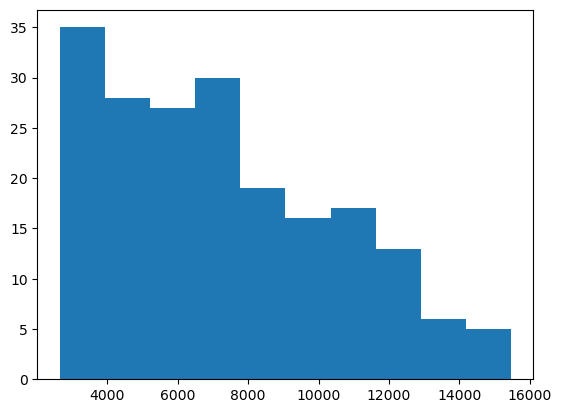

In [37]:
# plt의 hist 함수를 사용하자

plt.hist(df4['price_p'])
plt.show()

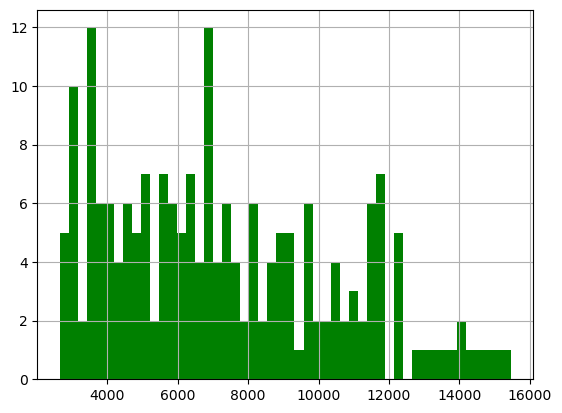

In [39]:
# 더 예쁘게 그리기
plt.hist(df4['price_p'],bins=50, color='g')
plt.grid()
plt.show()

In [41]:
# x축이 평당 가격임.
# 그걸 레이블로 설정하려면

from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)


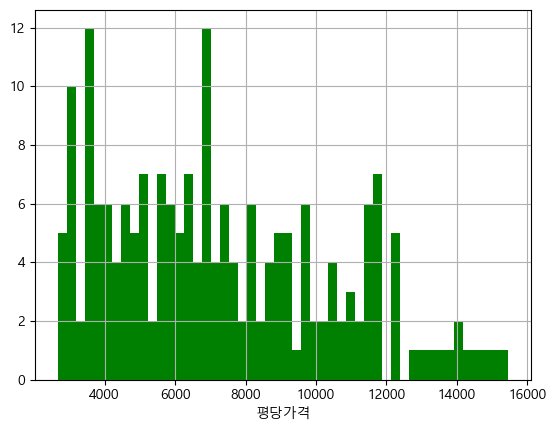

In [44]:
plt.hist(df4['price_p'],bins=50, color='g')
plt.xlabel("평당가격")
plt.grid()
plt.show()

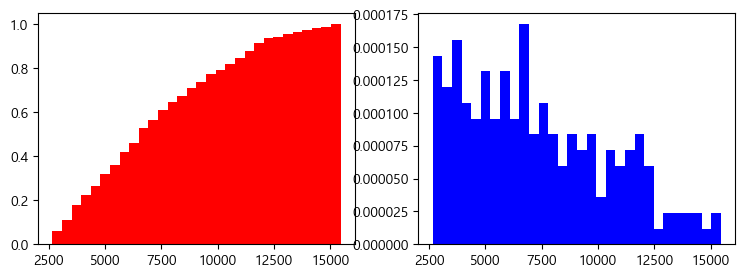

In [47]:
# 히스토그램을 여러개 그려서 하나의 object로 만들기

# (1,2) 가로로 두개 그리겠다. (2.1) 세로로 두개 그리겠다
# fig:전체 그래프의 이름 , axs:subplot 각각의 이름
# set_size: 전체 그래프의 가로 세로 길이 결정

fig,axs=plt.subplots(1,2)
fig.set_size_inches(9,3)

#axs[0]: 첫번째 그래프( 파이쎤은 0부터 시작한다)
#density: , cumulative=True: 누적확률을 계산함 

axs[0].hist(df4['price_p'],bins=30,density=True,color='red',cumulative=True)
axs[1].hist(df4['price_p'],bins=30,density=True,color='blue')
plt.show()